In [57]:
import seaborn as sns
import numpy as np
import helper as hp
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import json

In [2]:
path_data = '../../data-cic/'
absolute_path = os.path.abspath(os.path.dirname('__file__'))
path_data = os.path.join(absolute_path, path_data)

In [3]:
# Read json that contains bounding boxes from each image
with open(path_data + 'via_region_data _final.json', 'r') as json_file:
    dict_json = json.load(json_file)
clean_json = hp.clean_dict(dict_json)

In [4]:
# Get all bounding boxes

bounding_boxes = []
# Get images' names
keys = list(clean_json.keys())
# Iterate over all images' name
for name_img in keys:
    # Get bb from the image
    bb_list = hp.get_ground_truth(clean_json[name_img])
    
    for bb in bb_list:
        # Calculate area of bounding box
        bb.append(bb[0] + (bb[2] // 2)) # center coordinate x
        bb.append(bb[1] + (bb[3] // 2)) # center coordinate y
        bb.append((bb[2] + 1) * (bb[3] + 1)) # area of bounding box
        bounding_boxes.append(bb)

In [5]:
bounding_boxes = np.array(bounding_boxes)
columns = ['Coordinate x', 'Coordinate y', 'Width', 'Height', 'Center x', 'Center y', 'Area']

In [6]:
# Create DataFrame for seabron
data = pd.DataFrame(bounding_boxes, columns=columns)
print(data.shape)

(768, 7)


## Display some bounding boxes

In [7]:
data.head()

,Coordinate x,Coordinate y,Width,Height,Center x,Center y,Area
0,1434,233,313,842,1590,654,264702
1,1237,258,296,744,1385,630,221265
2,1518,258,245,624,1640,570,153750
3,458,150,119,562,517,431,67560
4,226,209,238,565,345,491,135274


## Data info

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
Coordinate x    768 non-null int64
Coordinate y    768 non-null int64
Width           768 non-null int64
Height          768 non-null int64
Center x        768 non-null int64
Center y        768 non-null int64
Area            768 non-null int64
dtypes: int64(7)
memory usage: 42.1 KB


In [9]:
data.describe()

,Coordinate x,Coordinate y,Width,Height,Center x,Center y,Area
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02
mean,679.699219,472.278646,154.248698,397.480469,756.570312,670.772135,8.421060e+04
std,441.560749,203.893479,103.767777,236.236605,436.932418,222.049007,1.156063e+05
min,1.000000,1.000000,21.000000,71.000000,38.000000,150.000000,1.584000e+03
25%,325.500000,340.000000,86.750000,238.000000,406.500000,505.000000,2.077725e+04
50%,639.500000,453.000000,125.000000,342.000000,716.500000,667.000000,4.258100e+04
75%,962.750000,636.250000,198.000000,524.500000,1012.750000,838.250000,1.037400e+05
max,1835.000000,1374.000000,726.000000,1492.000000,1869.000000,1470.000000,1.077946e+06


## Width and height histograms

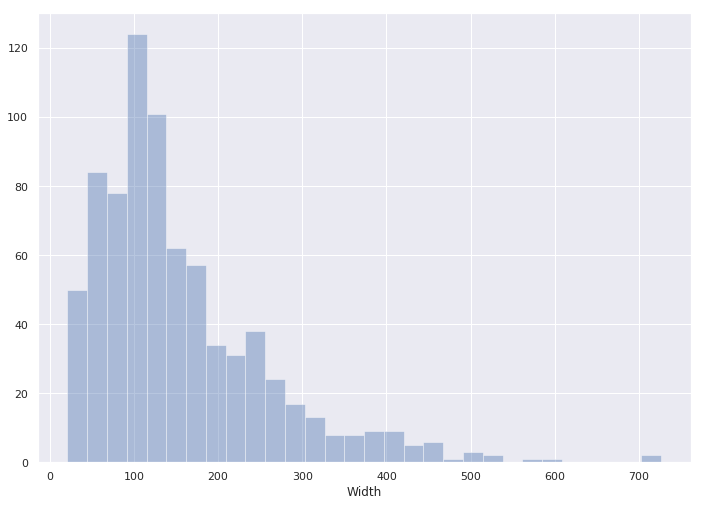

In [70]:
sns.distplot(data['Width'], kde=False, bins=30)

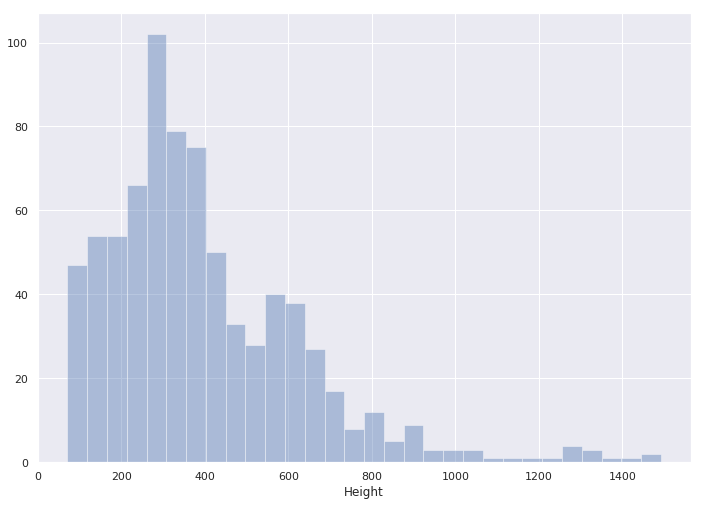

In [71]:
sns.distplot(data['Height'], kde=False, bins=30)

## Comparison between width and height

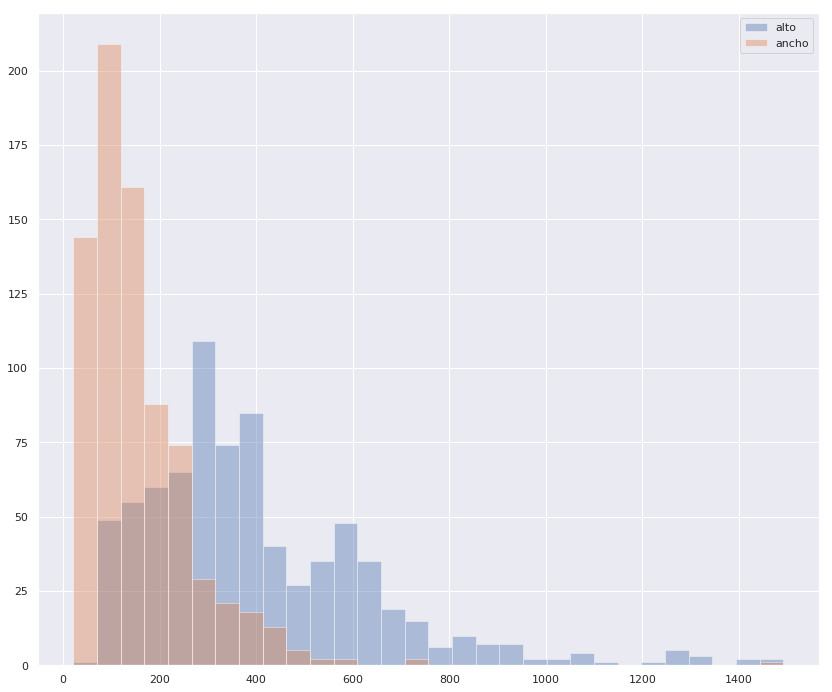

In [123]:
fig, ax = plt.subplots(figsize=(14, 12))

# Add max and min to have equal bins
width_data = pd.concat([data['Width'], pd.Series([data['Height'].max()])])
height_data = pd.concat([data['Height'], pd.Series([data['Width'].min()])])

sns.distplot(height_data, kde=False, bins=30, label='alto')
sns.distplot(width_data, kde=False, bins=30, label='ancho')
plt.legend()
# file.figure.savefig('/tmp/two_distribution.png')


## Area histogram

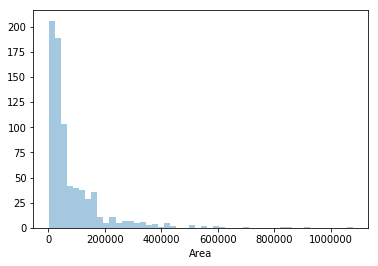

In [41]:
sns.distplot(data['Area'], bins=50, kde=False)

In [14]:
# file.figure.savefig('prueba.png')

## Size Distribution

/home/aldopedraza/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


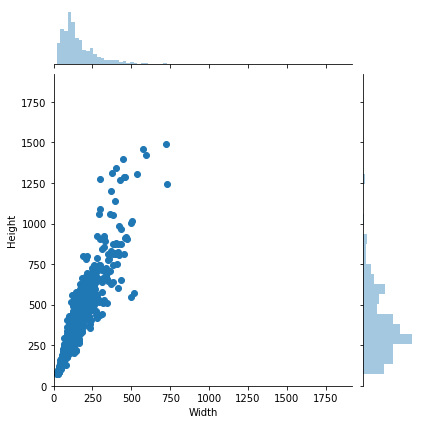

In [46]:
plot = sns.jointplot(x='Width', y='Height', data=data, kind='scatter', xlim=(0, 1920), ylim=(0, 1920))

## Gathering bounding boxes

/home/aldopedraza/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


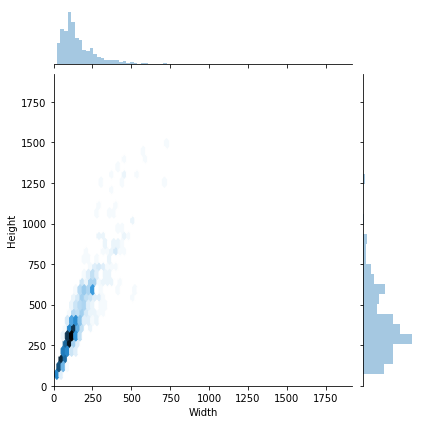

In [47]:
# sns.jointplot(x='Width', y='Height', data=data, kind='kdeplot')
sns.jointplot(x='Width', y='Height', data=data, kind='hex', xlim=(0, 1920), ylim=(0, 1920))

## Position Distribution

/home/aldopedraza/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


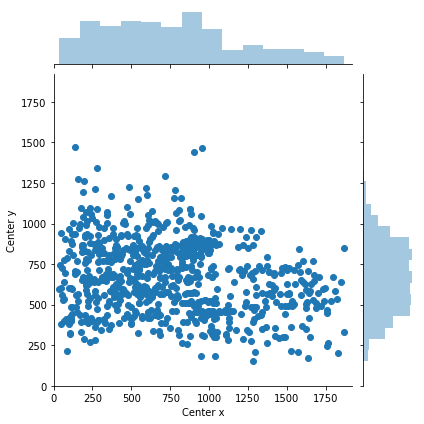

In [50]:
sns.jointplot(x='Center x', y='Center y', data=data, kind='scatter', xlim=(0, 1920), ylim=(0, 1920))